<p align="center" style="font-size:32px;">
  <strong>Health Insurance Price Prediction </strong><br>
  by Raj Chandravanshi
</p>

# <a> Objective:- </a>
#### Developed a predictive model to estimate medical insurance charges using demographic, lifestyle, and health-related factors.

1. Problem identification
2. Business Understanding
3. Collection Data
4. Pre_processing data
5. EDA (Exploratory Data Analysis)
6. Feature Engineering And selection
7. Model training , Evaluation ,selection  
8. Model Testing
  

# <a> 1. Loading All Libraries </a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# <a> 2. About the  </a>

The Health Insurance dataset (`insurance.csv`) contains **1,338 records** with the following features:

- **age**: Age of the individual (integer)  
- **sex**: Gender (male/female)  
- **bmi**: Body Mass Index — an indicator of health status  
- **children**: Number of dependents covered by health insurance  
- **smoker**: Smoking status (yes/no)  
- **region**: Residential area in the US (northeast, northwest, southeast, southwest)  
- **charges**: Medical insurance costs billed to the individual (**target variable**)  

---


In [58]:
df = pd.read_csv('insurance.csv')

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [60]:
print(f"Dataset contains {df.shape[0]} number of rows and {df.shape[1]} number of columns")

Dataset contains 1338 number of rows and 7 number of columns


**Conclusion:-**
- In our data, there are 7(including target(expenses) column) columns and 1338 rows.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Conclusions :-
- In our data, there are seven columns (age, sex, bmi, children, smoker, redion, expenses), and the data types of these columns are given above.
- Age, bmi, Children, expenses ---> Numerical columns
- sex, smoker, region ---> categorical columns

In [62]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Conclusion:-**
- There are no null values in our data.

In [63]:
df.describe()  # for the descriptive analysis of the dataset

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [64]:
df.corr(method='pearson', min_periods=1, numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# <a> 3. EDA (Exploratory Data Analysis) <a>

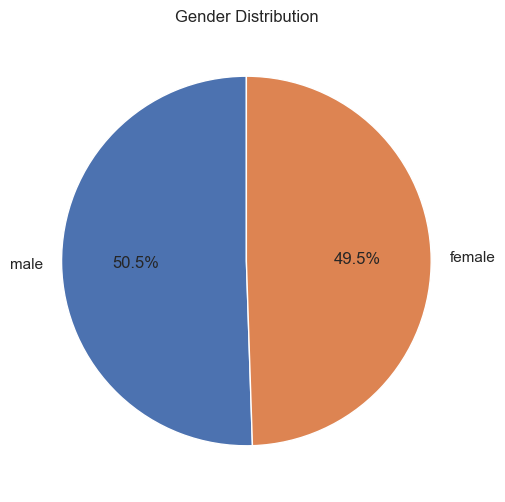

In [65]:
Gender_counts = df["sex"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Gender Distribution")
plt.show()

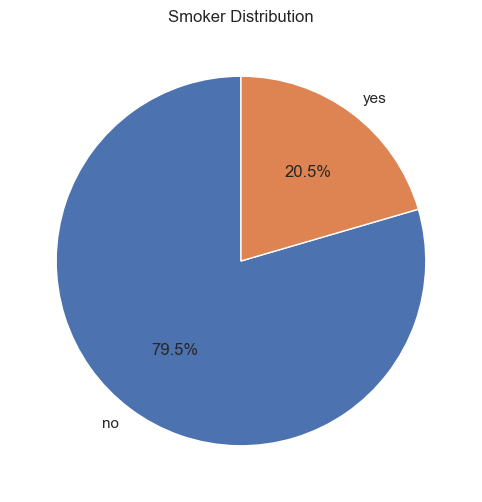

In [66]:
smoker_counts = df["smoker"].value_counts()
plt.figure(figsize=(8,6))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Smoker Distribution")
plt.show()

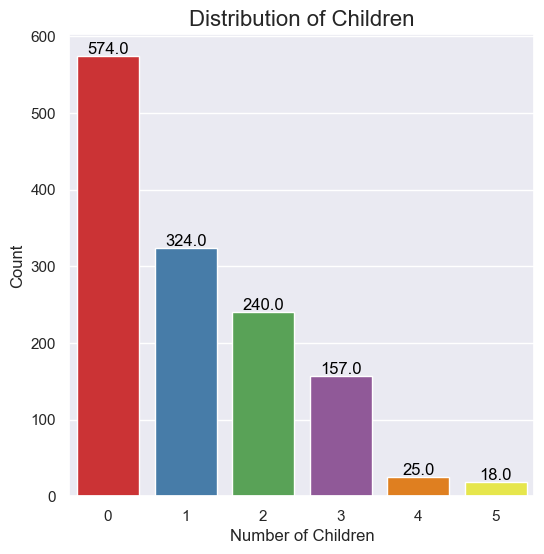

In [67]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='children', data=df, palette="Set1")
plt.title("Distribution of Children", fontsize=16)
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

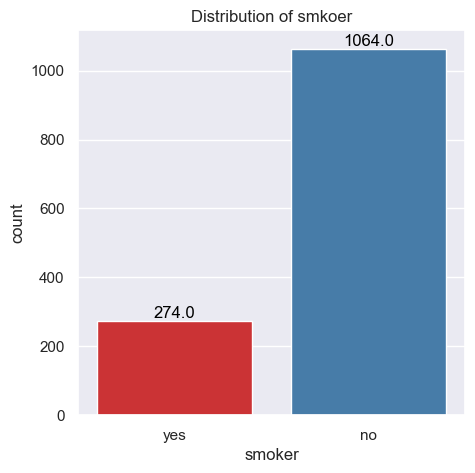

In [68]:
# for Children column
plt.figure(figsize = (5,5))
ax = sns.countplot(x='smoker',data= df,palette="Set1")

plt.title("Distribution of smkoer")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


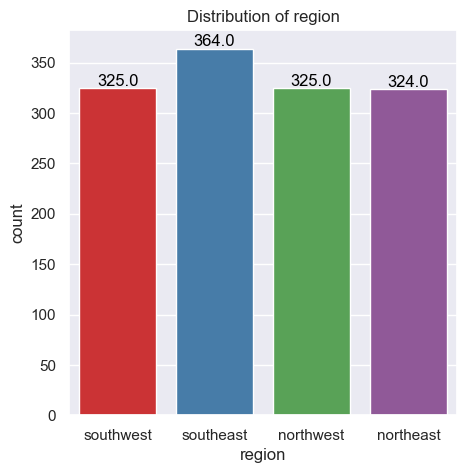

In [69]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x='region',data= df,palette="Set1" )
plt.title("Distribution of region")
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

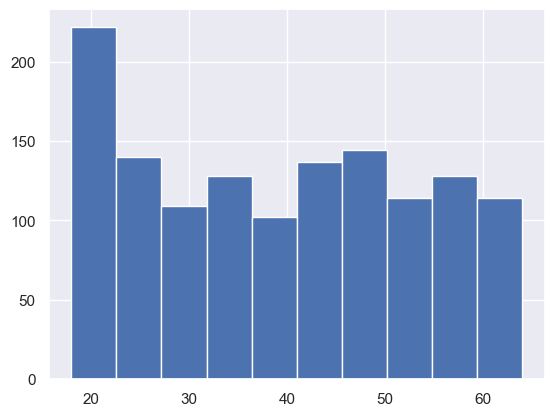

In [70]:
# histogram of age
df.age.mean()
import matplotlib.pyplot as plt
plt.hist(df["age"],bins = 10)

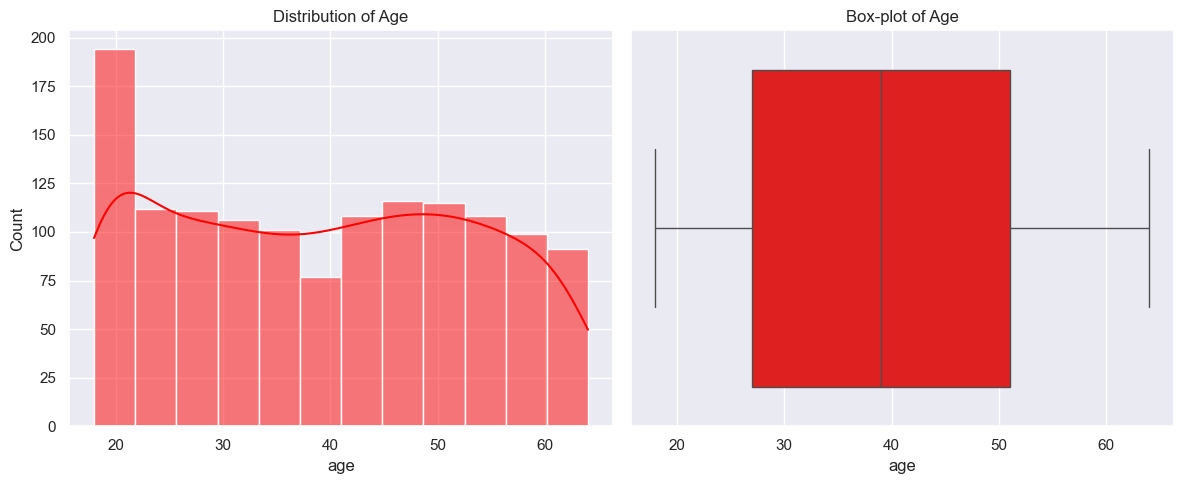

In [71]:
# for age
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["age"], kde=True, color="red")
plt.title("Distribution of Age")


plt.subplot(1, 2, 2)
sns.boxplot(x=df["age"], color="red")
plt.title("Box-plot of Age")

plt.tight_layout()
plt.show()


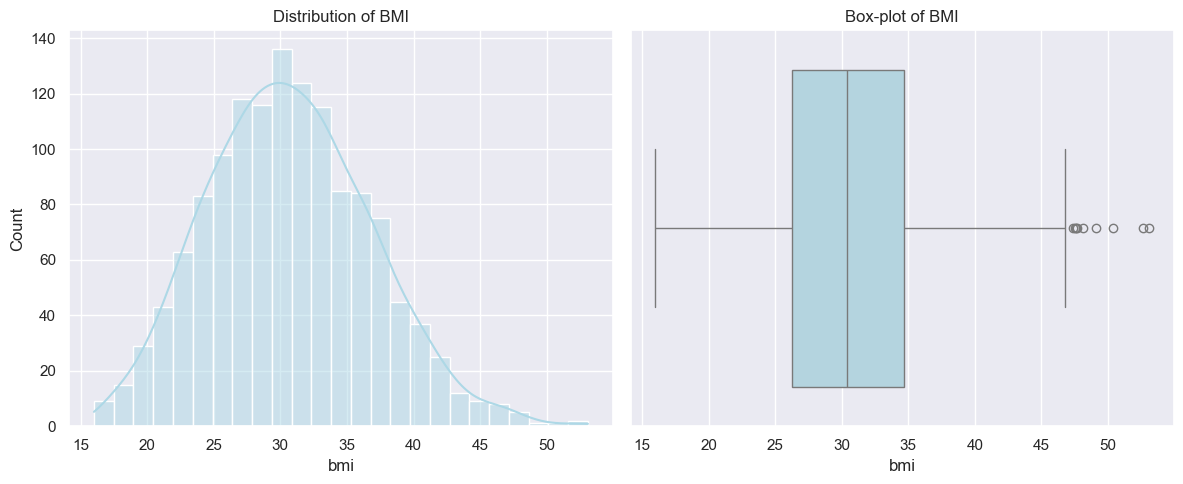

In [72]:
# for bmi
plt.figure(figsize=(12, 5))

# Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(df["bmi"], kde=True, color="lightblue")
plt.title("Distribution of BMI")

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df["bmi"], color="lightblue")
plt.title("Box-plot of BMI")

plt.tight_layout()
plt.show()

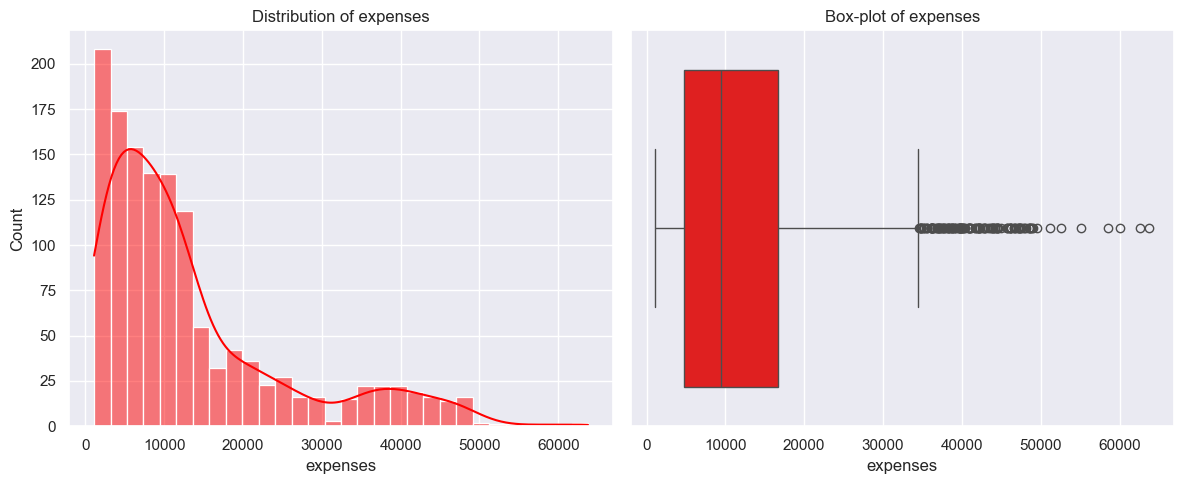

In [73]:
# for exp
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["expenses"], kde=True, color="red")
plt.title("Distribution of expenses")


plt.subplot(1, 2, 2)
sns.boxplot(x=df["expenses"], color="red")
plt.title("Box-plot of expenses")

plt.tight_layout()
plt.show()

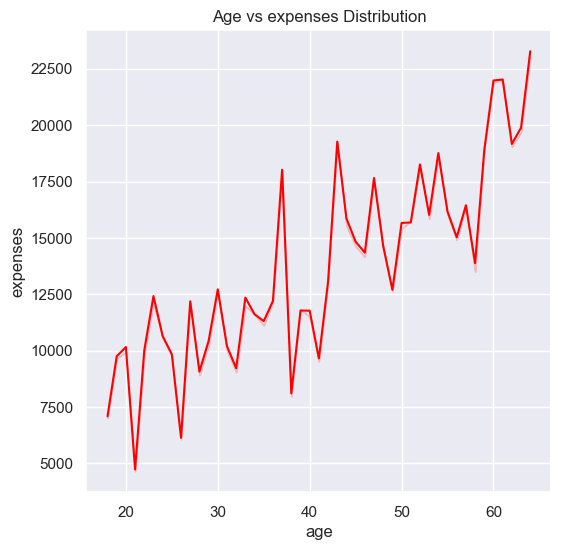

In [74]:
# Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='expenses',data= df, color="red", ci = False)
plt.title('Age vs expenses Distribution')
plt.show()


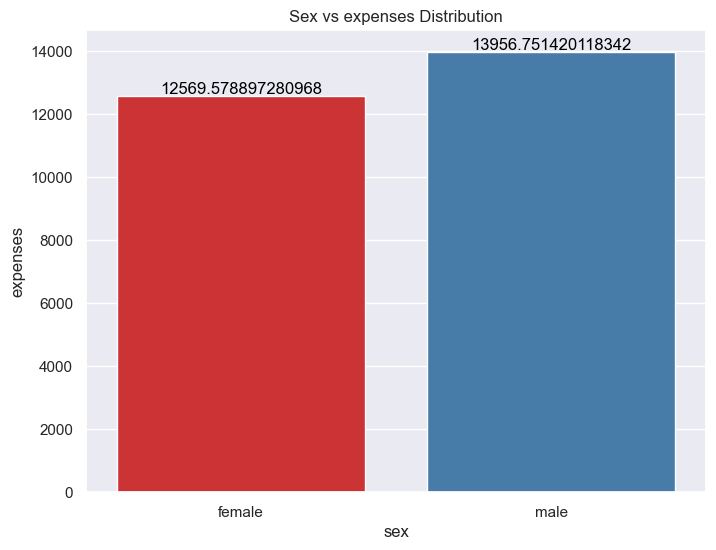

In [75]:
#Barplot for Sex and Charges
plt.figure(figsize=(8,6))
ax = sns.barplot(x='sex',y='expenses',data= df , ci=None, palette="Set1")
plt.title('Sex vs expenses Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()
plt.show()

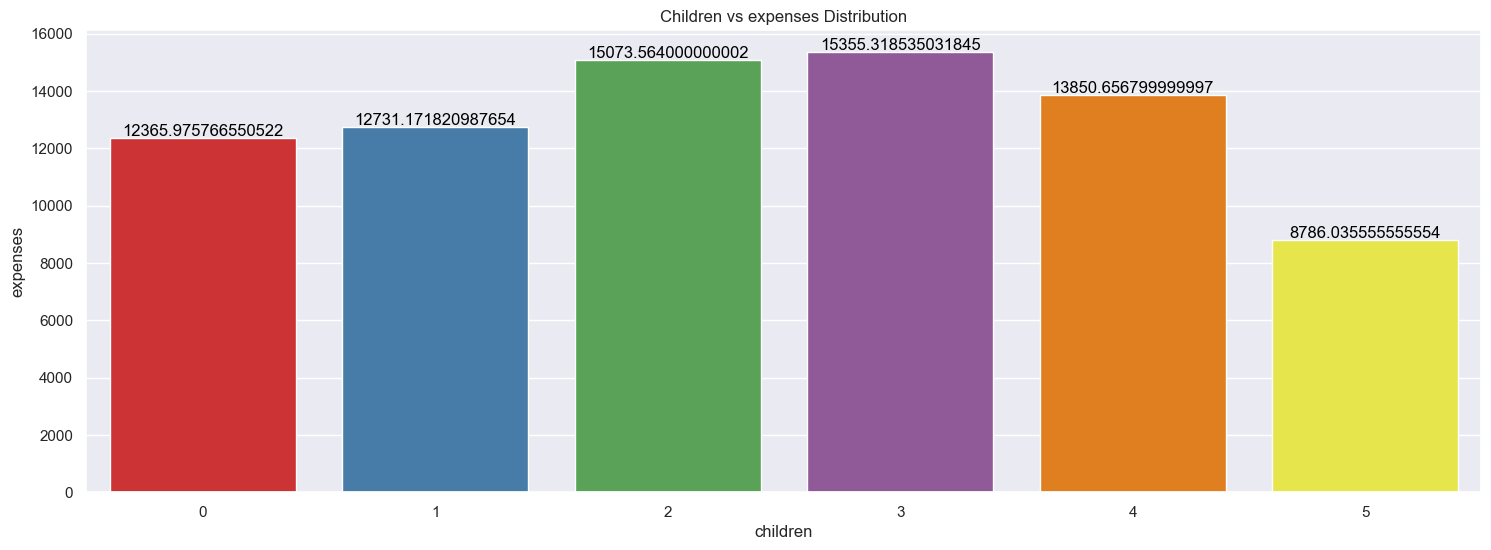

In [76]:
plt.figure(figsize=(18,6))
ax = sns.barplot(x='children',y='expenses',data= df , ci=None, palette="Set1")
plt.title('Children vs expenses Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

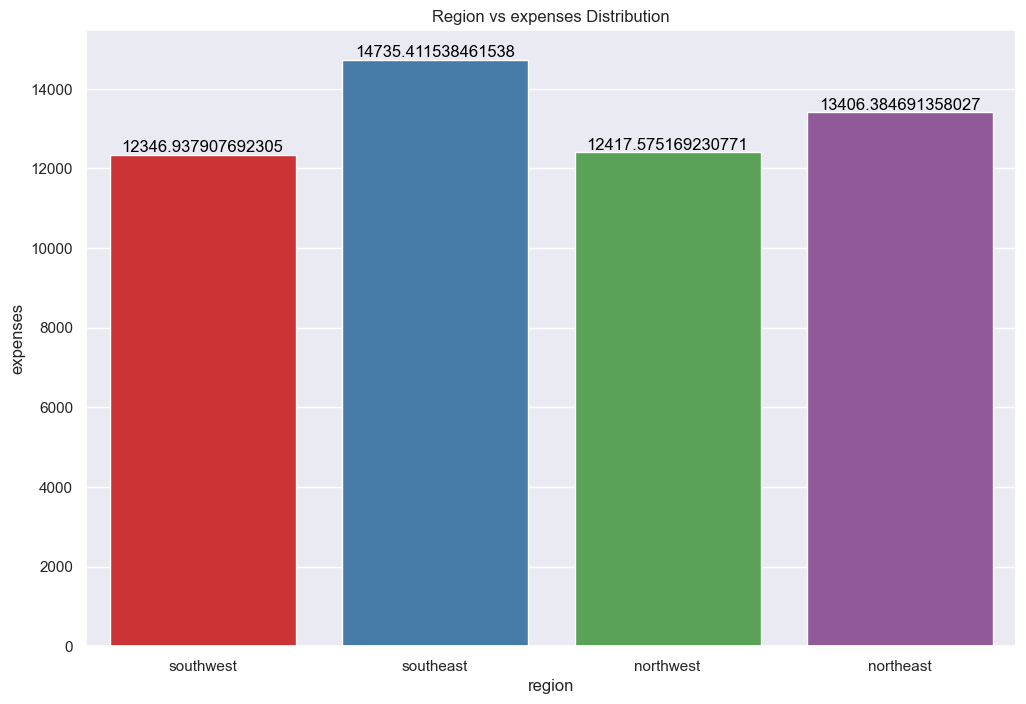

In [77]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='region',y='expenses',data= df , ci = None, palette="Set1")
plt.title('Region vs expenses Distribution')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()

Correlation between the numerical columns

<Axes: >

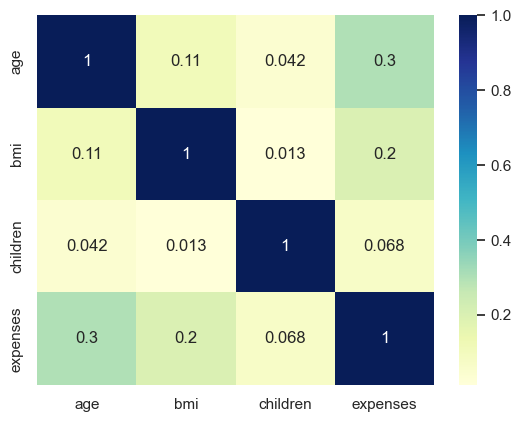

In [78]:
correlation = df.corr(method='pearson', min_periods=1, numeric_only=True)
sns.heatmap(correlation, cmap="YlGnBu", annot=True)

**Conclusion :-**

Simply form the above table, and we say that the correlation coefficient between age and expenses is 0.3 and BMI vs. expenses is 0.2, which is high relative to others.

# <a> 4. Models Assumptions </a>

#### <a> a. Multicollinearity </a>

In [79]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("expenses", axis=1)
X_const = sm.add_constant(X)
X_const = X_const.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) 
                   for i in range(X_const.shape[1])]

print(vif_data)

            Feature        VIF
0             const  35.529129
1               age   1.016843
2               bmi   1.106682
3          children   1.004008
4          sex_male   1.008900
5        smoker_yes   1.012067
6  region_northwest   1.518823
7  region_southeast   1.652253
8  region_southwest   1.529371


** Conclusion :- **
- All features have VIF values below 5 (except the constant), indicating no significant multicollinearity among the predictors.

#### <a> b. Linearity </a>

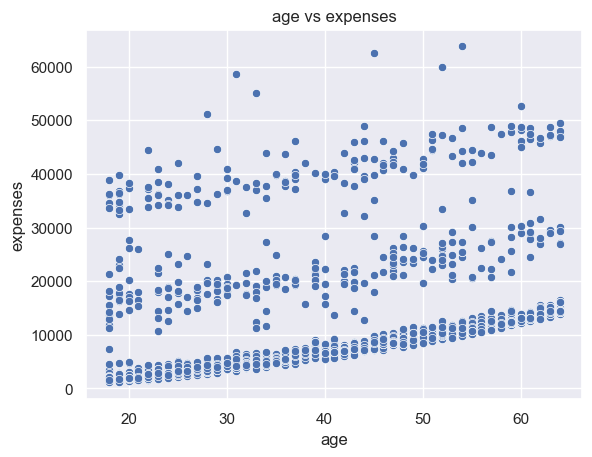

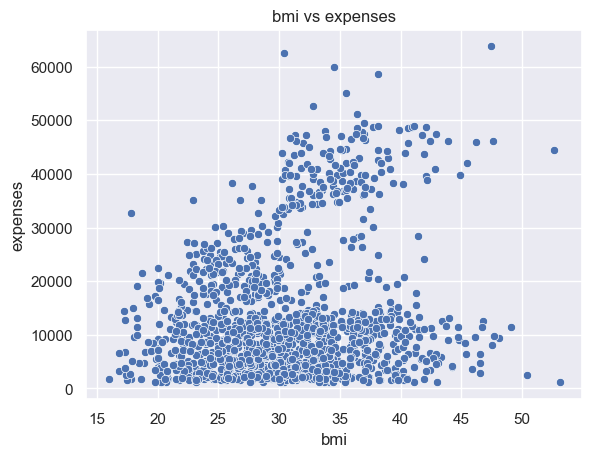

In [80]:
for col in ["age", "bmi"]:  # numerical predictors
    sns.scatterplot(x=df[col], y=df["expenses"])
    plt.title(f"{col} vs expenses")
    plt.show()

** Conclusion :-**
- From the scatterplots, we observe that the numerical features exhibit a roughly linear relationship with insurance charges.

#### <a> c. Independence of Residuals

In [81]:
y = df_encoded["expenses"] 
model = sm.OLS(y, X_const).fit()
residuals = model.resid
fitted = model.fittedvalues

In [82]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print("Durbin-Watson Statistic:", dw_stat)

Durbin-Watson Statistic: 2.0881876360405682


** Conclusion :-**
- The Durbin-Watson statistic is 2.04, indicating that the residuals are independent and the assumption of error independence is satisfied.

#### <a> d. Homoscedasticity </a>

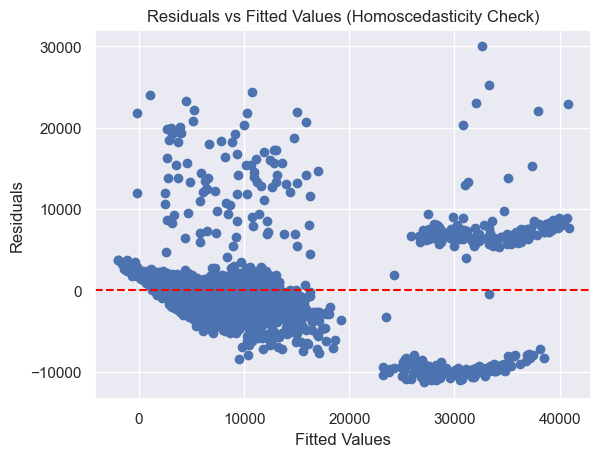

In [83]:
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Homoscedasticity Check)")
plt.show()


In [84]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ["Lagrange Multiplier", "p-value", "f-value", "f p-value"]
print("Breusch-Pagan Test:")
print(dict(zip(labels, bp_test)))


Breusch-Pagan Test:
{'Lagrange Multiplier': np.float64(121.58863393868009), 'p-value': np.float64(1.5574091114020524e-22), 'f-value': np.float64(16.60532972366603), 'f p-value': np.float64(1.2421420682449464e-23)}


** Conclusion:- **
- The Breusch-Pagan test yields a p-value of 1.69 × 10⁻²², which is far below the 0.05 significance level.
- This indicates strong evidence of heteroscedasticity, meaning the variance of residuals is not constant across the predicted values.

#### <a> e. Linearity 

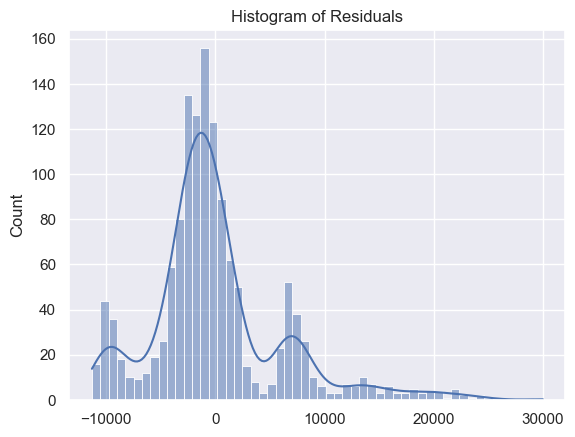

In [85]:
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

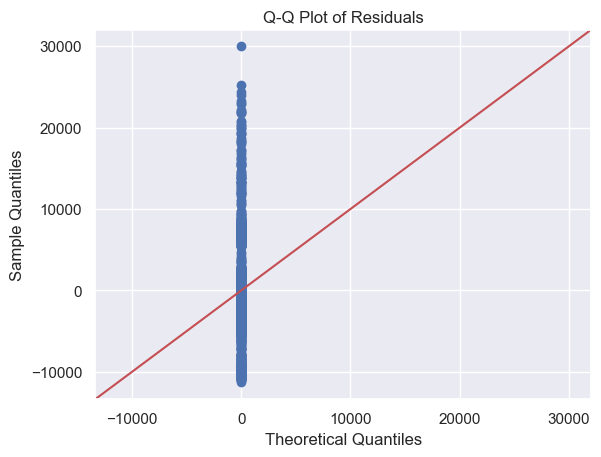

In [86]:
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [87]:
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print("Shapiro-Wilk Test p-value:", p)

Shapiro-Wilk Test p-value: 8.390996659765863e-29


** Conclusion :- **

- The null hypothesis (H₀) of the Shapiro-Wilk test states that residuals are normally distributed.
- Since p-value ≪ 0.05, we reject H₀, indicating that the residuals do not follow a normal distribution.
- Therefore, the normality assumption of the OLS regression is violated.

** Implication:- **

- Since the normality assumption of OLS regression is violated, the confidence intervals (CI) and hypothesis tests (t-tests, F-tests) for the estimated coefficients may not be reliable.

# <a> 5. Feature Engineering  and Model building</a>

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["expenses"]),df["expenses"],test_size = 0.2, random_state= 5)

In [89]:
X_train.shape , X_test.shape

((1070, 6), (268, 6))

Encoding Categorical data into Numerical data

In [90]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [91]:
trf1 = ColumnTransformer([
    ("ohe_sex",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["sex"]),
    ("ohe_smoker",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["smoker"]),
    ("ohe_region",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),["region"])
], remainder='passthrough')

In [92]:
trf2 = LinearRegression()

In [93]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(trf1, trf2)

In [94]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [95]:
predict_lr = pipe.predict(X_test)

In [96]:
# Lasso / L2
from sklearn.linear_model import Lasso
pipe2 = make_pipeline(
    trf1,        
    Lasso(alpha=10)  
)

In [97]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('lasso', Lasso(alpha=10))])

In [98]:
predict_lasso = pipe2.predict(X_test)

In [99]:
# Ridge/L2
from sklearn.linear_model import Ridge
pipe3 = make_pipeline(
    trf1,        
    Ridge(alpha=0.1)  
)


In [100]:
pipe3.fit(X_train, y_train)
predict_ridge = pipe3.predict(X_test)

In [101]:
r2_lr = r2_score(y_test, predict_lr)
r2_las = r2_score(y_test, predict_lasso)
r2_ridge = r2_score(y_test, predict_ridge)

In [102]:
performance_df = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R2 Score": [r2_lr, r2_las, r2_ridge]
})

In [103]:
performance_df = performance_df.sort_values(by="R2 Score", ascending=False)

In [104]:
performance_df

,Model,R2 Score
1,Lasso Regression,0.778167
0,Linear Regression,0.778128
2,Ridge Regression,0.778115


In [105]:
x_t = trf1.fit_transform(X_train,y_train)

In [106]:
n = df.shape[0]
k = x_t.shape[1]
def adjusted_r2(r2,n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [107]:
performance_df["Adjusted_r2"] = 1 - (1 - performance_df['R2 Score'])*(n - 1)/(n - k - 1)

In [108]:
performance_df.sort_values(by="Adjusted_r2", ascending=False)


,Model,R2 Score,Adjusted_r2
1,Lasso Regression,0.778167,0.776327
0,Linear Regression,0.778128,0.776288
2,Ridge Regression,0.778115,0.776274


# Testing phase

In [109]:
input_data = [
    [19, "female", 27.9, 0, "yes", "southwest"]
]
input_df = pd.DataFrame(input_data, columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])


output = 16884.92

In [110]:
print("Prediction from Linear Rigression:", pipe.predict(input_df))
print("Prediction from Lasso Rigression:", pipe2.predict(input_df))
print("Prediction from Ridge:", pipe3.predict(input_df))

Prediction from Linear Rigression: [25124.5514274]
Prediction from Lasso Rigression: [25100.54231714]
Prediction from Ridge: [25119.09956771]
